<a href="https://colab.research.google.com/github/divyani95/Data_Analysis-Pavagada-/blob/main/Pavagada_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/content/2025-01-23_Pavagada.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows and basic information
print(df.head())
print(df.info())

                  period_end  00_02_18  00_03_49  00_05_22  00_06_58  \
0  2025-01-23 00:05:00+00:00       0.0       NaN       NaN       NaN   
1  2025-01-23 00:10:00+00:00       0.0       0.0       0.0       0.0   
2  2025-01-23 00:15:00+00:00       0.0       0.0       0.0       0.0   
3  2025-01-23 00:20:00+00:00       0.0       0.0       0.0       0.0   
4  2025-01-23 00:25:00+00:00       0.0       0.0       0.0       0.0   

   00_08_36  00_10_16  00_11_58  00_13_43  00_15_30  ...  14_31_39  14_42_15  \
0       NaN       NaN       NaN       NaN       NaN  ...       NaN       NaN   
1       0.0       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2       0.0       0.0       0.0       NaN       NaN  ...       NaN       NaN   
3       0.0       0.0       0.0       0.0       0.0  ...       NaN       NaN   
4       0.0       0.0       0.0       0.0       0.0  ...       NaN       NaN   

   14_52_36  15_02_54  15_05_34  15_16_20  15_27_03  15_37_52  15_48_20  \
0       NaN

In [5]:
# Drop rows with any missing values
df_cleaned.dropna(inplace=True)

In [6]:
# Convert 'period_end' to datetime format
df_cleaned['period_end'] = pd.to_datetime(df_cleaned['period_end'])

# Convert other columns to numeric
numeric_columns = df_cleaned.columns[1:]
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

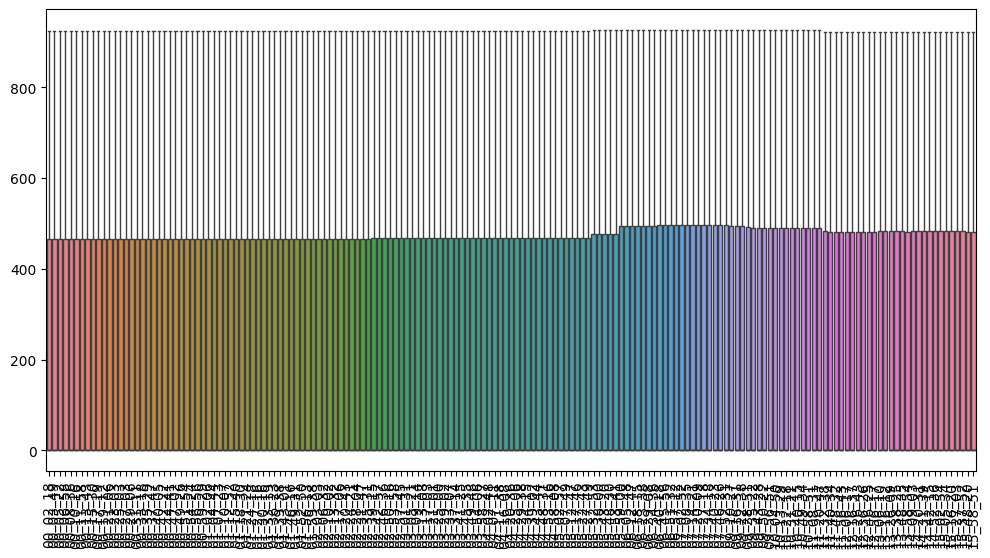

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned.iloc[:, 1:])
plt.xticks(rotation=90)
plt.show()

# Remove rows with outliers using IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers
df_cleaned = df_cleaned[~((df_cleaned < (Q1 - 1.5 * IQR)) | (df_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric columns
scaler = MinMaxScaler()
df_cleaned.iloc[:, 1:] = scaler.fit_transform(df_cleaned.iloc[:, 1:])

In [10]:
# Remove timezone information from 'period_end'
df_cleaned['period_end'] = df_cleaned['period_end'].dt.tz_localize(None)

# Save the cleaned DataFrame to Excel
output_file_path = '/content/cleaned_data.xlsx'
df_cleaned.to_excel(output_file_path, index=False)
print(f"Cleaned data saved to {output_file_path}")

Cleaned data saved to /content/cleaned_data.xlsx


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Columns: 170 entries, period_end to 15_58_51
dtypes: datetime64[ns](1), float64(169)
memory usage: 5.5 MB
None

Summary Statistics:
                period_end     00_02_18     00_03_49     00_05_22  \
count                 4224  4224.000000  4224.000000  4224.000000   
mean   2025-01-30 08:02:30     0.238487     0.238487     0.238487   
min    2025-01-23 00:05:00     0.000000     0.000000     0.000000   
25%    2025-01-26 16:03:45     0.000000     0.000000     0.000000   
50%    2025-01-30 08:02:30     0.000000     0.000000     0.000000   
75%    2025-02-03 00:01:15     0.504329     0.504329     0.504329   
max    2025-02-06 16:00:00     1.000000     1.000000     1.000000   
std                    NaN     0.332311     0.332311     0.332311   

          00_06_58     00_08_36     00_10_16     00_11_58     00_13_43  \
count  4224.000000  4224.000000  4224.000000  4224.000000  4224.000000   
mean      

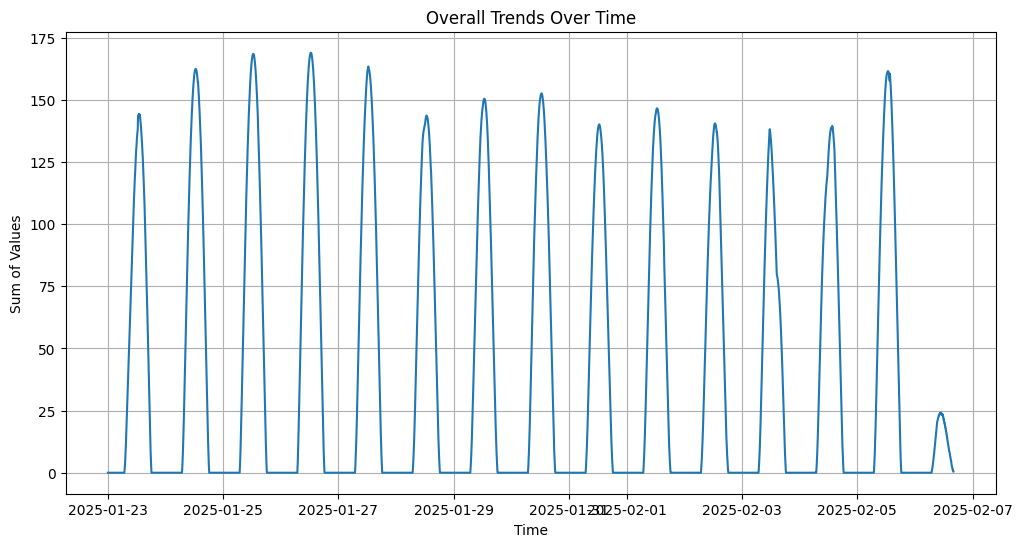

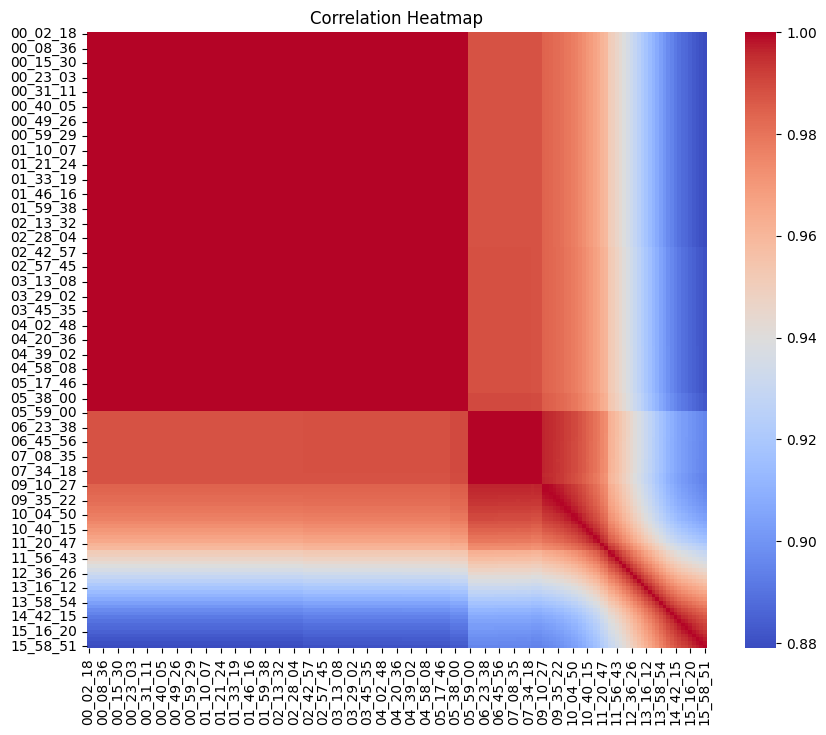

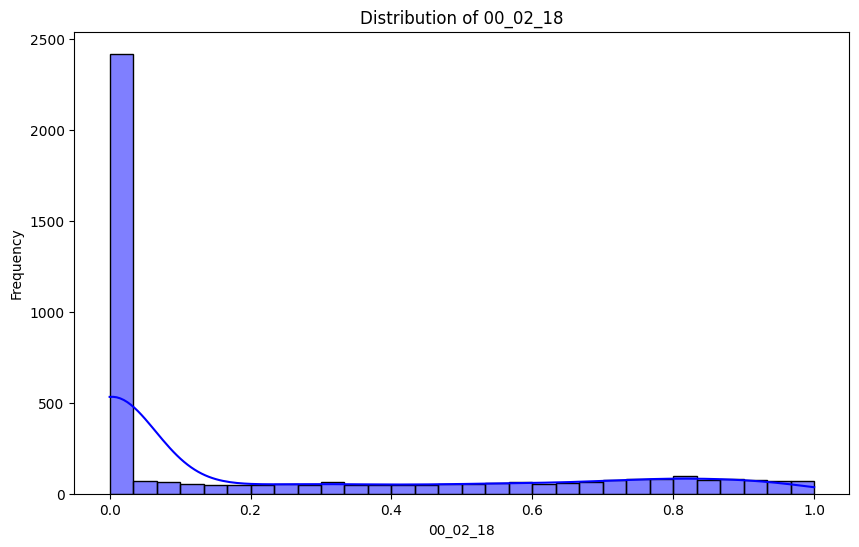

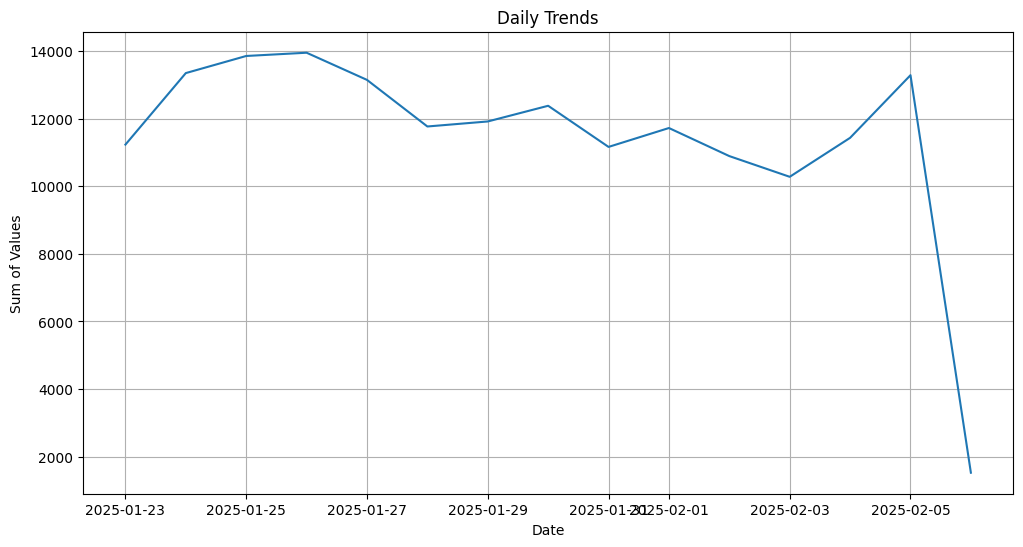


Anomalies Detected:
Empty DataFrame
Columns: [period_end, 00_02_18, 00_03_49, 00_05_22, 00_06_58, 00_08_36, 00_10_16, 00_11_58, 00_13_43, 00_15_30, 00_17_19, 00_19_12, 00_21_06, 00_23_03, 00_25_03, 00_27_03, 00_29_06, 00_31_11, 00_33_18, 00_35_29, 00_37_47, 00_40_05, 00_42_22, 00_44_41, 00_47_02, 00_49_26, 00_51_54, 00_54_24, 00_56_56, 00_59_29, 01_02_06, 01_04_44, 01_07_23, 01_10_07, 01_12_52, 01_15_40, 01_18_30, 01_21_24, 01_24_18, 01_27_16, 01_30_16, 01_33_19, 01_36_23, 01_39_38, 01_43_01, 01_46_16, 01_49_31, 01_52_50, 01_56_13, 01_59_38, 02_03_03, 02_06_32, 02_10_02, 02_13_32, 02_17_06, 02_20_43, 02_24_21, 02_28_04, 02_31_47, 02_35_31, 02_39_15, 02_42_57, 02_46_36, 02_50_16, 02_53_58, 02_57_45, 03_01_31, 03_05_21, 03_09_14, 03_13_08, 03_17_03, 03_21_01, 03_25_00, 03_29_02, 03_33_07, 03_37_14, 03_41_25, 03_45_35, 03_49_48, 03_54_06, 03_58_27, 04_02_48, 04_07_11, 04_11_38, 04_16_08, 04_20_36, 04_25_06, 04_29_38, 04_34_15, 04_39_02, 04_43_44, 04_48_31, 04_53_16, 04_58_08, 05_02_57, 0

In [13]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = '/content/cleaned_data.xlsx'
df_cleaned = pd.read_excel(file_path)

# Convert 'period_end' to datetime if not already
df_cleaned['period_end'] = pd.to_datetime(df_cleaned['period_end'])

# Step 1: Basic Data Inspection
print("Dataset Info:")
print(df_cleaned.info())
print("\nSummary Statistics:")
print(df_cleaned.describe())

# Step 2: Check for Missing Values
missing_values = df_cleaned.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Step 3: Time Series Analysis
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['period_end'], df_cleaned.iloc[:, 1:].sum(axis=1))
plt.title("Overall Trends Over Time")
plt.xlabel("Time")
plt.ylabel("Sum of Values")
plt.grid(True)
plt.show()

# Step 4: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned.iloc[:, 1:].corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Distribution of a Specific Column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned.iloc[:, 1], kde=True, bins=30, color="blue")
plt.title(f"Distribution of {df_cleaned.columns[1]}")
plt.xlabel(df_cleaned.columns[1])
plt.ylabel("Frequency")
plt.show()

# Step 6: Aggregations (Group by Day)
df_cleaned['date'] = df_cleaned['period_end'].dt.date
# Exclude non-numeric columns before applying groupby and sum
numeric_columns = df_cleaned.select_dtypes(include='number').columns
daily_summary = df_cleaned.groupby('date')[numeric_columns].sum()

# Plot daily trends
plt.figure(figsize=(12, 6))
plt.plot(daily_summary.index, daily_summary.sum(axis=1))
plt.title("Daily Trends")
plt.xlabel("Date")
plt.ylabel("Sum of Values")
plt.grid(True)
plt.show()

# Step 7: Anomaly Detection (Simple Threshold Method)
# Example: Highlight rows where a specific column exceeds a threshold
threshold = df_cleaned.iloc[:, 1].mean() + 3 * df_cleaned.iloc[:, 1].std()
anomalies = df_cleaned[df_cleaned.iloc[:, 1] > threshold]

print("\nAnomalies Detected:")
print(anomalies)

# Step 8: Export Insights
output_anomalies_path = '/content/anomalies.xlsx'
anomalies.to_excel(output_anomalies_path, index=False)
print(f"Anomalies saved to {output_anomalies_path}")